In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\taran\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\taran\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\taran\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [4]:
pip install tensorflow


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\taran\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import sklearn
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import utils, callbacks
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics

In [6]:
train_folder = 'C:/Users/taran/AppData/Local/Programs/Python/Python311/Scripts/Indian/Indian'
all_data = []
for folder in os.listdir(train_folder):
    
    label_folder = os.path.join(train_folder, folder)
    onlyfiles = [{'label':folder,'path':os.path.join(label_folder, f)} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    #print(onlyfiles)
    all_data += onlyfiles
data_df = pd.DataFrame(all_data)
data_df

,label,path
0,1,C:/Users/taran/AppData/Local/Programs/Python/P...
1,1,C:/Users/taran/AppData/Local/Programs/Python/P...
2,1,C:/Users/taran/AppData/Local/Programs/Python/P...
3,1,C:/Users/taran/AppData/Local/Programs/Python/P...
4,1,C:/Users/taran/AppData/Local/Programs/Python/P...
...,...,...
42740,Z,C:/Users/taran/AppData/Local/Programs/Python/P...
42741,Z,C:/Users/taran/AppData/Local/Programs/Python/P...
42742,Z,C:/Users/taran/AppData/Local/Programs/Python/P...
42743,Z,C:/Users/taran/AppData/Local/Programs/Python/P...


In [7]:
x_train,x_holdout = train_test_split(data_df, test_size= 0.10, random_state=42,stratify=data_df[['label']])
x_train,x_test = train_test_split(x_train, test_size= 0.20, random_state=42,stratify=x_train[['label']])

In [8]:
img_width, img_height = 64, 64
batch_size = 128
y_col = 'label'
x_col = 'path'
no_of_classes = len(data_df[y_col].unique())


train_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=x_train,x_col=x_col, y_col=y_col,
    target_size=(img_width, img_height),class_mode='categorical', batch_size=batch_size,
    shuffle=False,
)

validation_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=x_test, x_col=x_col, y_col=y_col,
    target_size=(img_width, img_height), class_mode='categorical', batch_size=batch_size,
    shuffle=False
)

holdout_datagen = ImageDataGenerator(rescale = 1/255.0)
holdout_generator = holdout_datagen.flow_from_dataframe(
    dataframe=x_holdout, x_col=x_col, y_col=y_col,
    target_size=(img_width, img_height), class_mode='categorical', batch_size=batch_size,
    shuffle=False
)

Found 30776 validated image filenames belonging to 35 classes.
Found 7694 validated image filenames belonging to 35 classes.
Found 4275 validated image filenames belonging to 35 classes.


In [9]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(35, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0

In [10]:
epochs = 10
learning_rate = 0.0001

adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator,
                    epochs=epochs,
                    verbose=1,
                    validation_data=validation_generator, shuffle=True)

Epoch 1/10
241/241 [==============================] - 89s 365ms/step - loss: 0.2292 - accuracy: 0.9464 - val_loss: 0.0068 - val_accuracy: 0.9987
Epoch 2/10
241/241 [==============================] - 76s 316ms/step - loss: 0.0046 - accuracy: 0.9988 - val_loss: 0.0020 - val_accuracy: 0.9992
Epoch 3/10
241/241 [==============================] - 75s 310ms/step - loss: 4.5631e-04 - accuracy: 0.9999 - val_loss: 4.4786e-04 - val_accuracy: 0.9997
Epoch 4/10
241/241 [==============================] - 78s 322ms/step - loss: 1.7101e-04 - accuracy: 0.9999 - val_loss: 1.0244e-04 - val_accuracy: 1.0000
Epoch 5/10
241/241 [==============================] - 79s 327ms/step - loss: 5.3090e-04 - accuracy: 0.9999 - val_loss: 2.8363e-04 - val_accuracy: 0.9999
Epoch 6/10
241/241 [==============================] - 76s 315ms/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.0026 - val_accuracy: 0.9992
Epoch 7/10
241/241 [==============================] - 75s 313ms/step - loss: 6.9598e-04 - accuracy: 0.9999

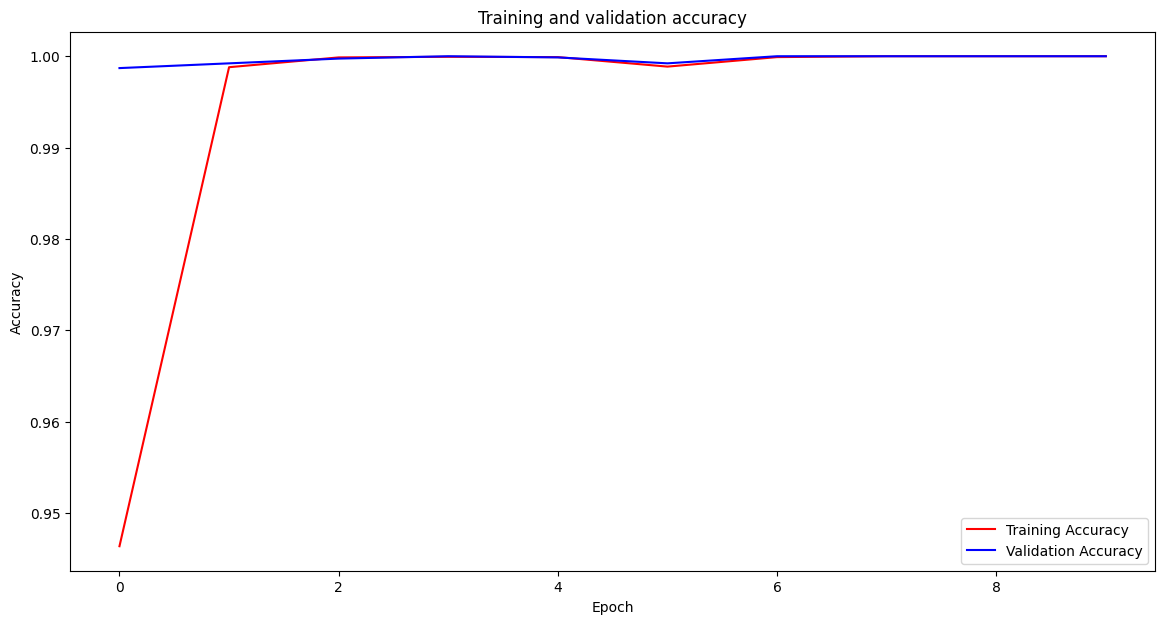

In [11]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

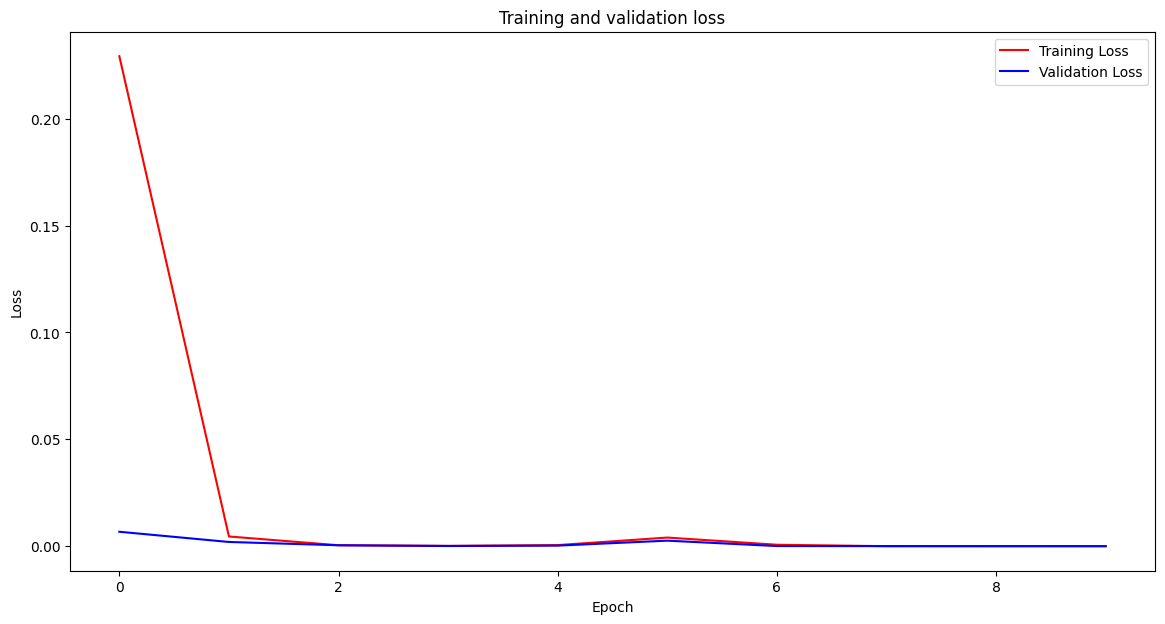

In [12]:
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [13]:
predictions = model.predict(holdout_generator, verbose=1)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=-1)
predictions = np.argmax(predictions, axis=-1) #multiple categories

true_classes = holdout_generator.classes
class_labels = list(holdout_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

34/34 [==============================] - 7s 194ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00       120
           3       1.00      1.00      1.00       120
           4       1.00      1.00      1.00       120
           5       1.00      1.00      1.00       120
           6       1.00      1.00      1.00       120
           7       1.00      1.00      1.00       120
           8       1.00      1.00      1.00       120
           9       1.00      1.00      1.00       120
           A       1.00      1.00      1.00       120
           B       1.00      1.00      1.00       120
           C       1.00      1.00      1.00       145
           D       1.00      1.00      1.00       120
           E       1.00      1.00      1.00       120
           F       1.00      1.00      1.00       120
           G       1.00      1.00      1.00       120
           H       1.00   

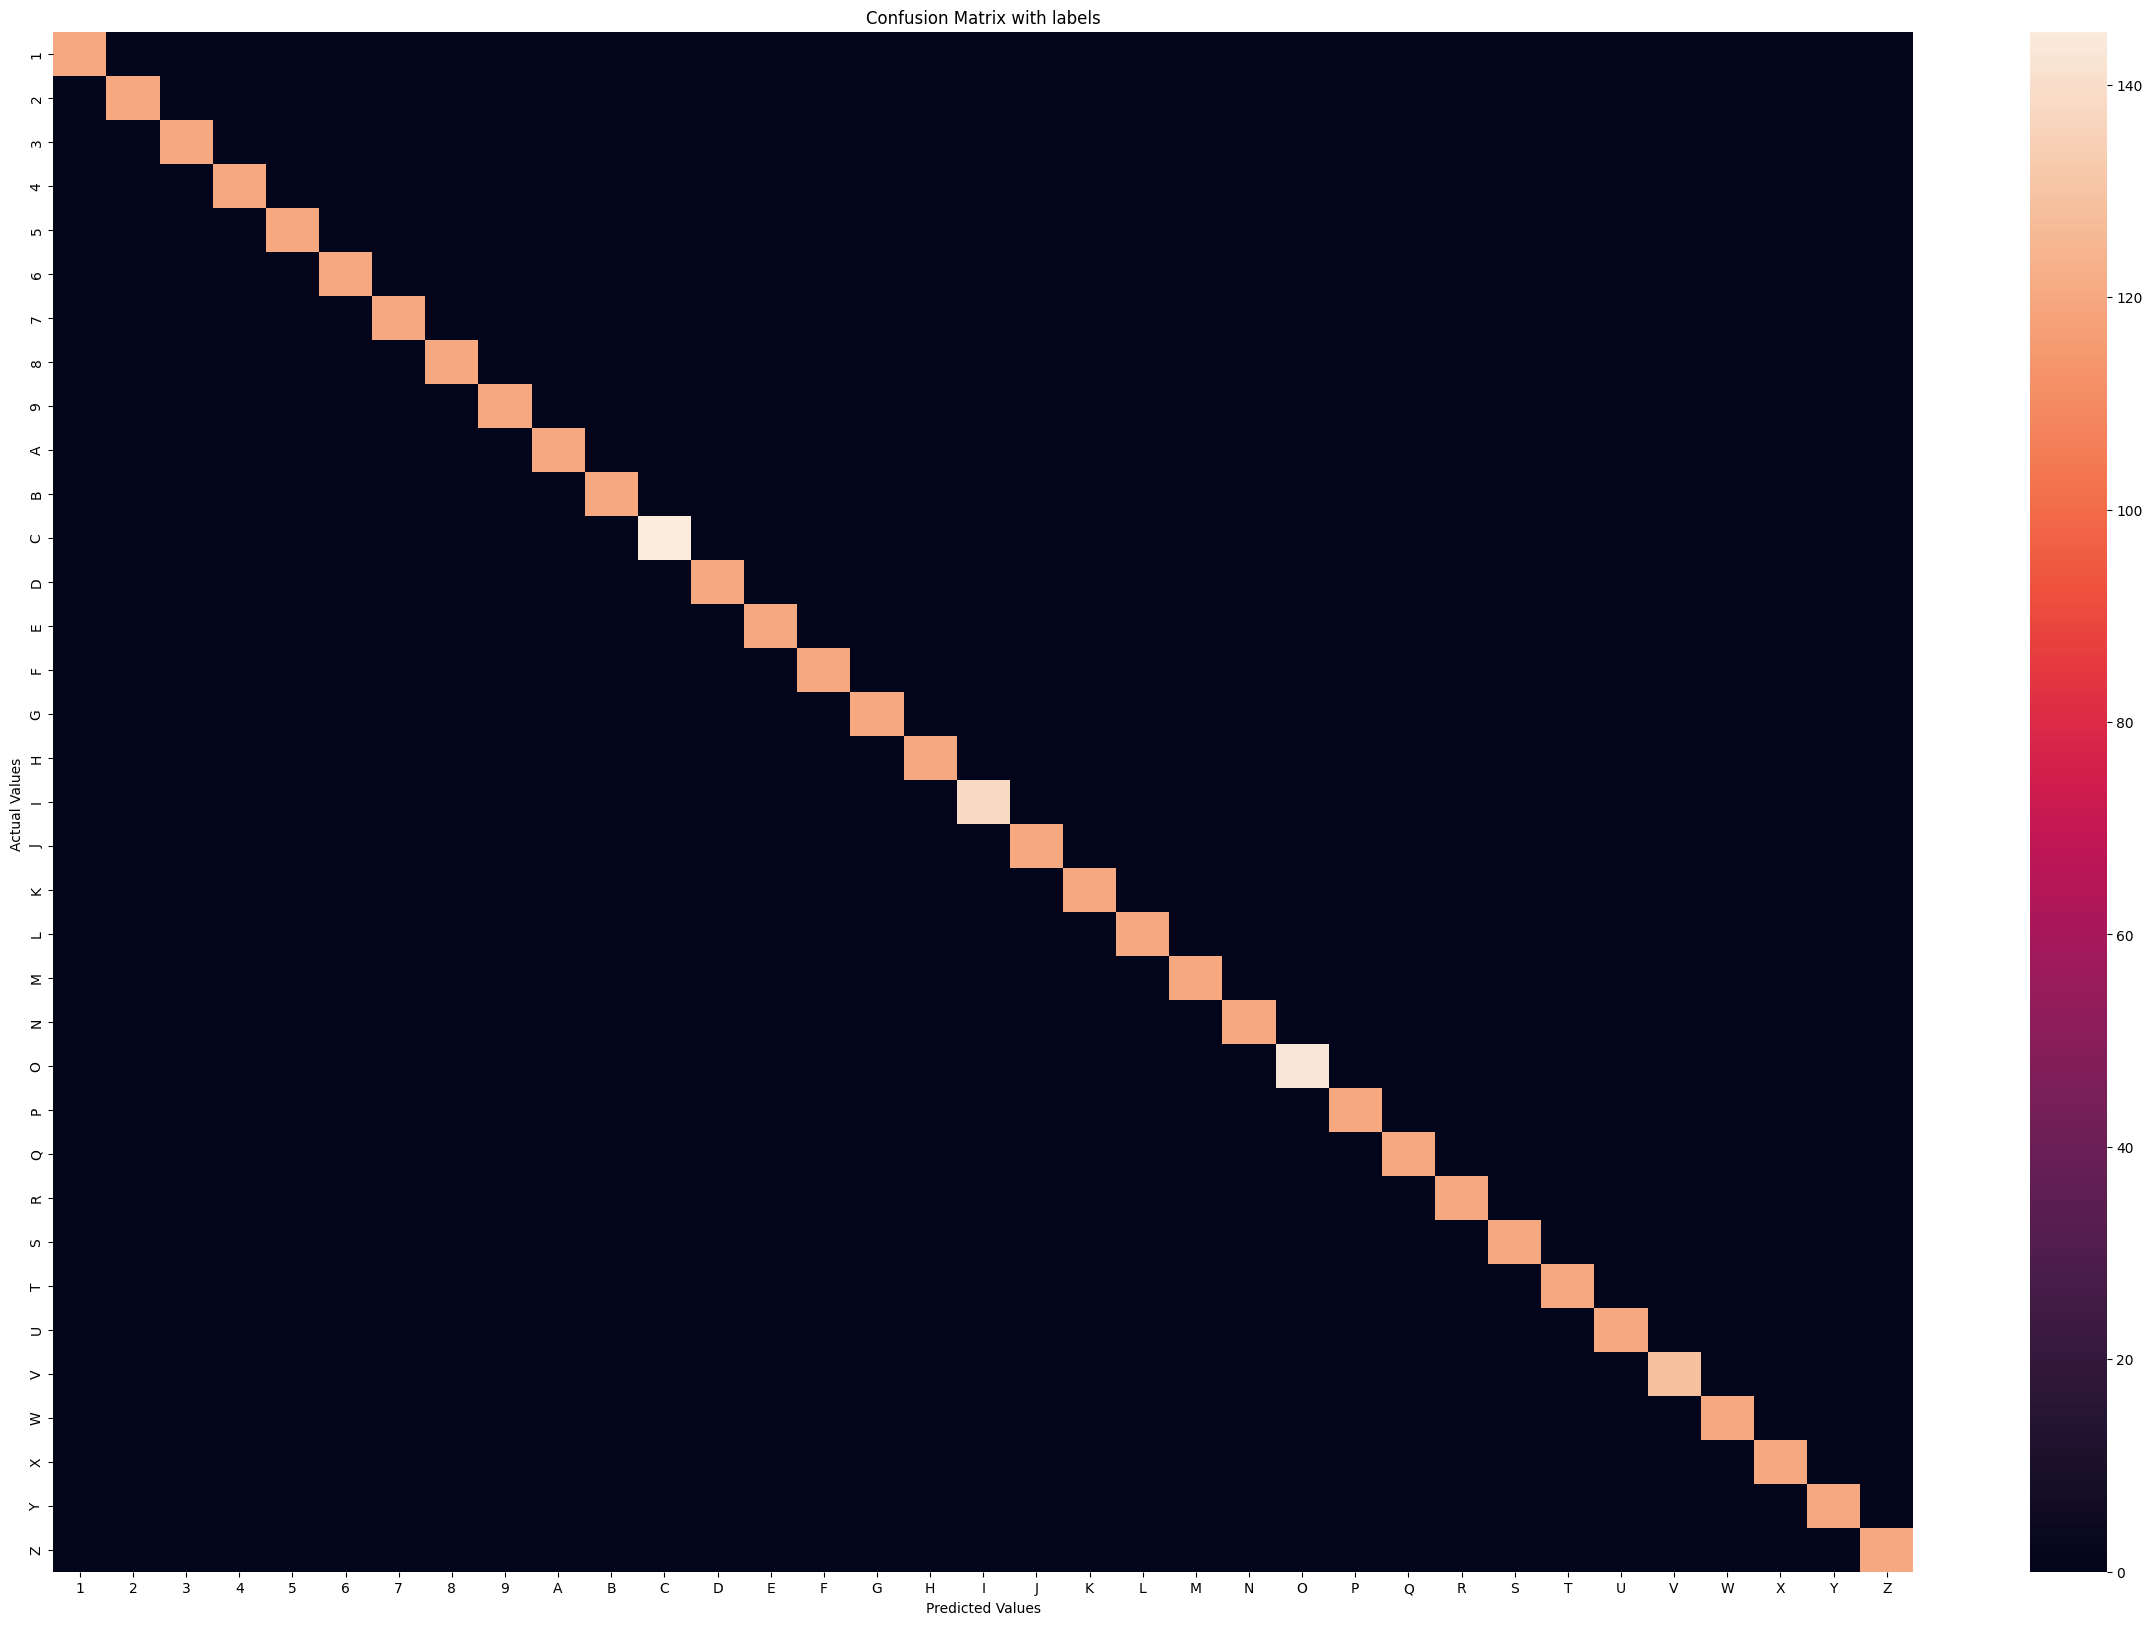

In [14]:
plt.figure(figsize=(30, 20))

ax = sns.heatmap(metrics.confusion_matrix(true_classes,predicted_classes))
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')


## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

plt.show()

In [15]:
model.save('signCNN_isl.h5')

C:\Users\taran\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
confusion = metrics.confusion_matrix(true_classes, predicted_classes)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[120   0   0 ...   0   0   0]
 [  0 120   0 ...   0   0   0]
 [  0   0 120 ...   0   0   0]
 ...
 [  0   0   0 ... 120   0   0]
 [  0   0   0 ...   0 120   0]
 [  0   0   0 ...   0   0 120]]


<Axes: >

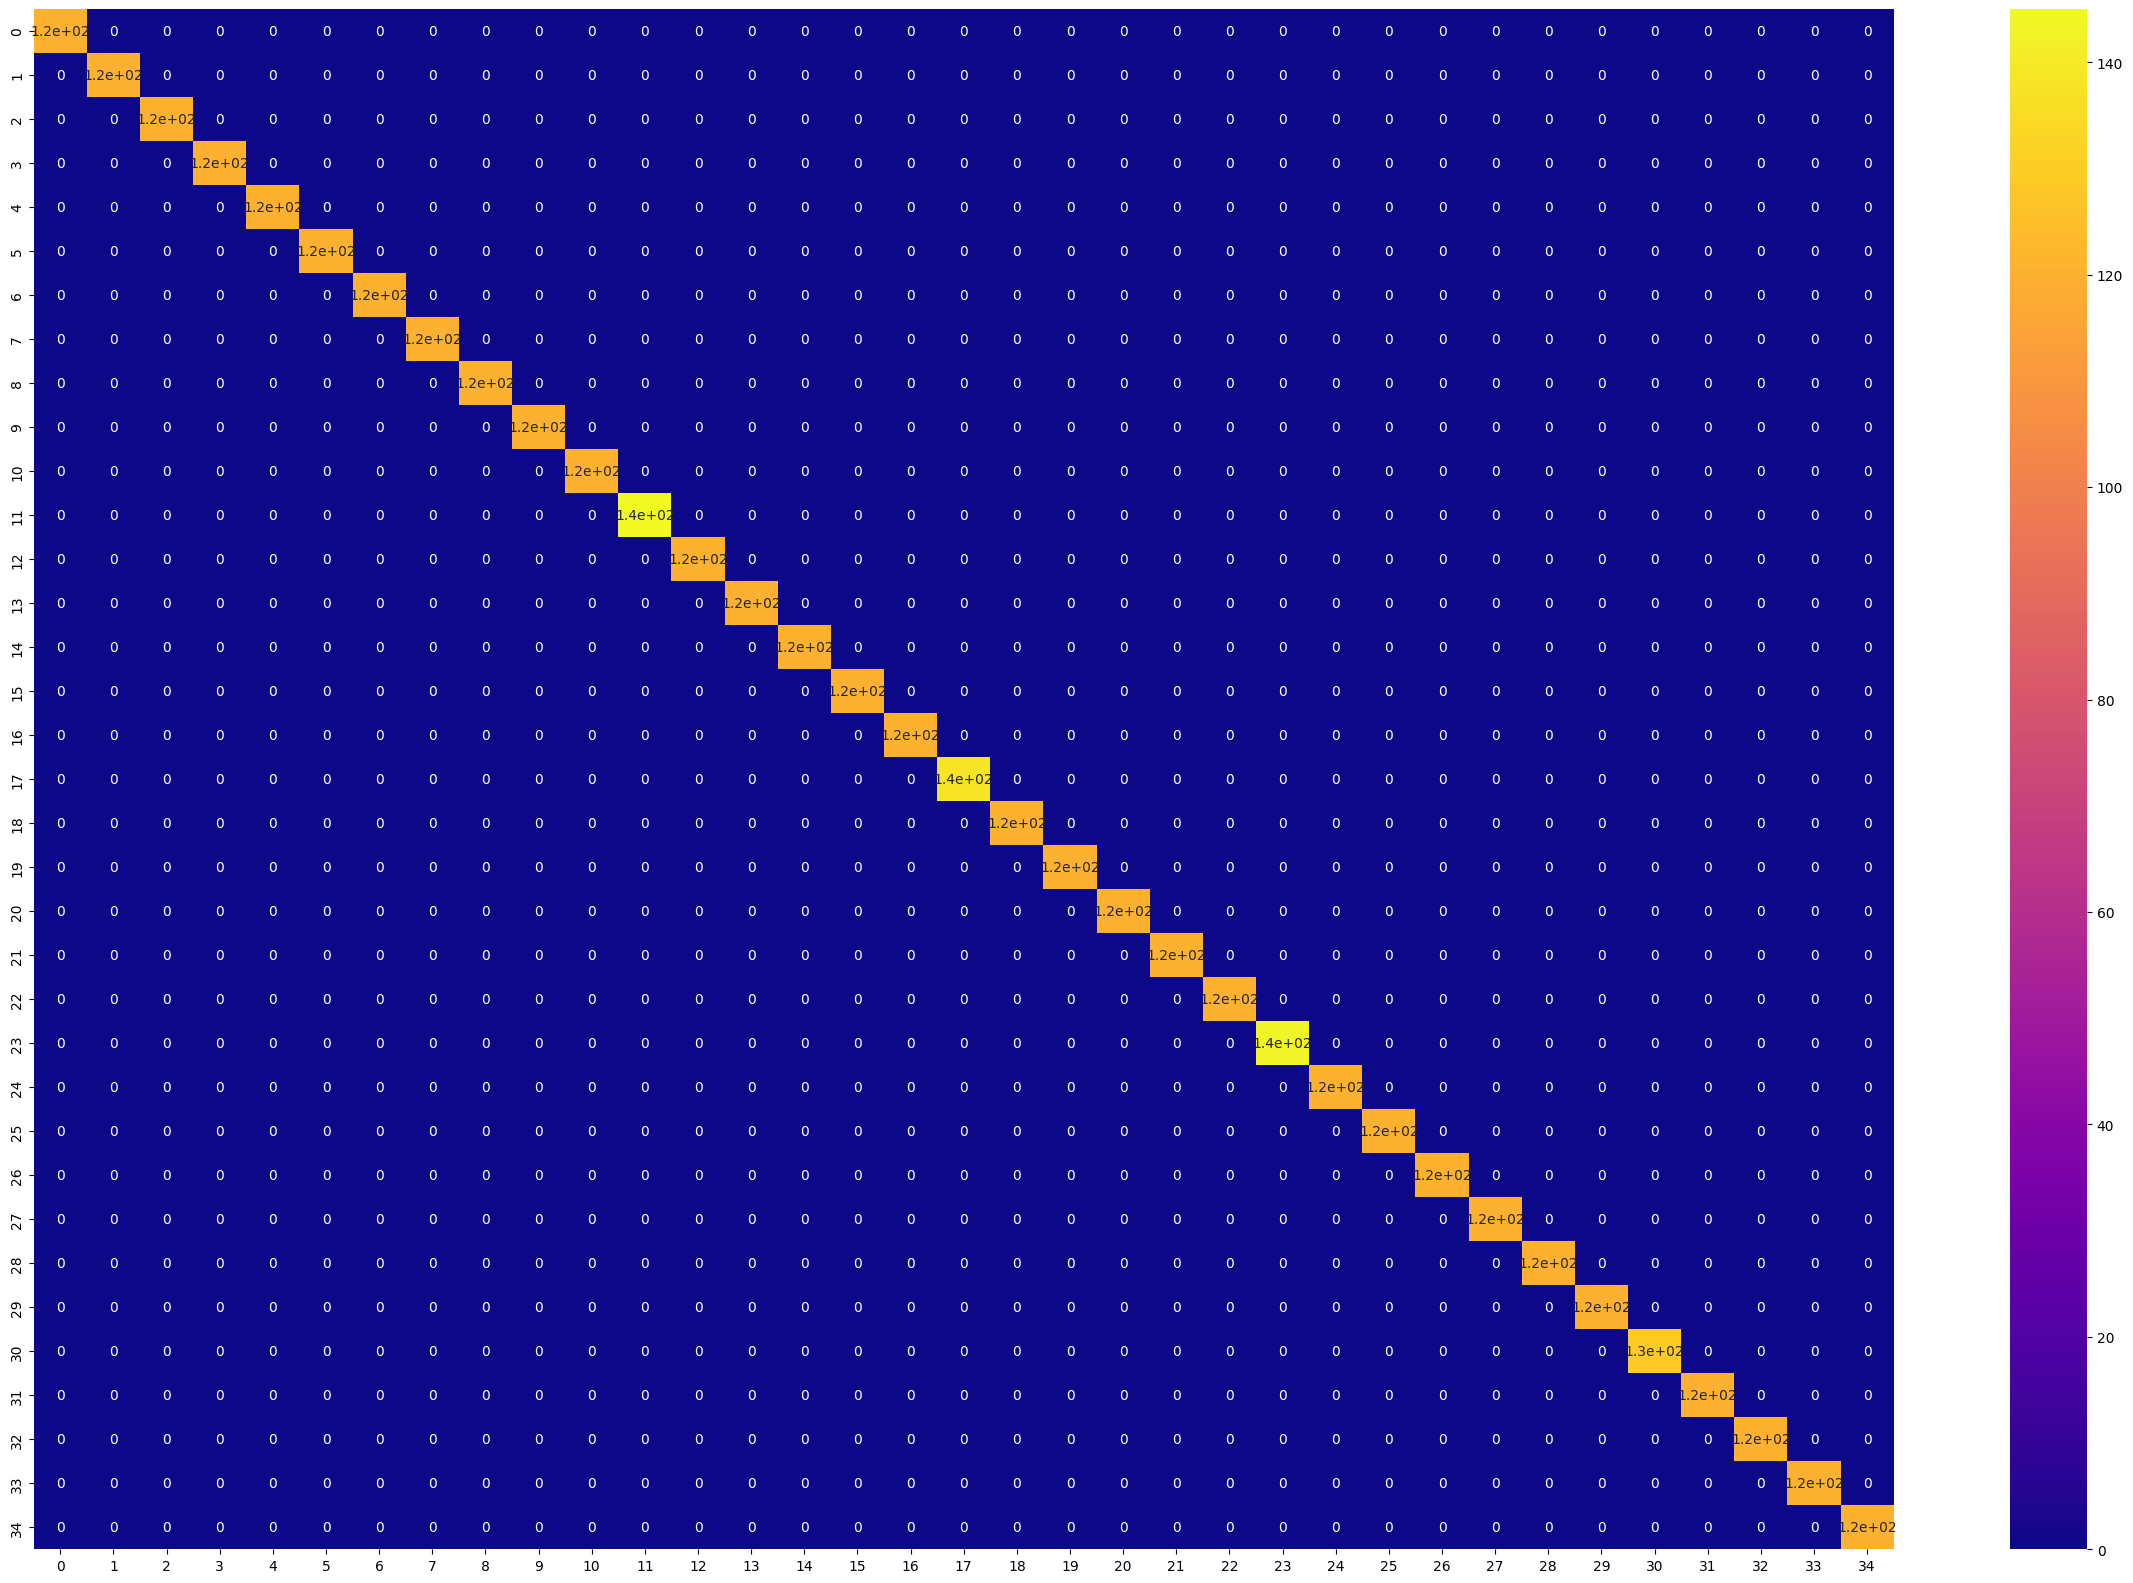

In [17]:
plt.figure(figsize=(30, 20))
sns.heatmap(confusion, cmap="plasma", annot=True)

In [18]:
model_json = model.to_json()
with open("CNN_isl_model.json", "w") as json_file:
    json_file.write(model_json)

In [19]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\taran\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np

# Define the expected input size of the model
input_shape = (64, 64, 3)

map_characters = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: 'A', 10: 'B', 11: 'C', 12: 'D',
                  13: 'E', 14: 'F', 15: 'G', 16: 'H', 17: 'I', 18: 'J', 19: 'K', 20: 'L', 21: 'M', 22: 'N', 23: 'O', 24: 'P',
                  25: 'Q', 26: 'R', 27: 'S', 28: 'T', 29: 'U', 30: 'V', 31: 'W', 32: 'X', 33: 'Y', 34: 'Z'}
classes = list(map_characters.values())

def open_image():
    global file_path
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.png;*.jpg;*.jpeg")])
    if file_path:
        img = Image.open(file_path)
        img = img.resize(input_shape[:2])  # Resize the image to the expected input size
        img = ImageTk.PhotoImage(img)
        label.config(image=img)
        label.image = img  # Keep a reference to prevent image garbage collection

def run_function():
    if file_path:
        img = Image.open(file_path)
        img = img.resize(input_shape[:2])  # Resize the image to the expected input size
        img_array = np.array(img)
        img_array = img_array / 255.0  # Normalize the image data (if needed)
        # Assuming 'model' is your Keras model loaded elsewhere in the code
        predicted_label = model.predict(np.expand_dims(img_array, axis=0))
        predicted_class_index = np.argmax(predicted_label)
        predicted_class = classes[predicted_class_index]
        # Update the label with the predicted class
        predicted_label_var.set("Predicted Sign: " + predicted_class)

# Create the main window
root = tk.Tk()
root.title("Sanket")

# Set the background color
root.configure(bg="#f5d9b3")

# Create a canvas for a more attractive look
canvas = tk.Canvas(root, bg="#F5D9B3", height=400, width=400)
canvas.pack()

# Create a heading label
heading_label = tk.Label(root, text="Sanket", font=("Helvetica", 20), bg="#F5D9B3")
heading_label.pack()

# Create a sub heading label
subheading_label = tk.Label(root, text="The Sign Language Detection App", font=("Helvetica", 15), bg="#F5D9B3")
subheading_label.pack()

# Create a label to display the image
label = tk.Label(canvas)
label.pack(pady=10)

# Create a button to open the image
open_button = tk.Button(canvas, text="Open Image", command=open_image, bg="#F5D9B3")
open_button.pack(pady=10)

# Create a button to run the function on the selected image
run_button = tk.Button(canvas, text="Run Function", command=run_function, bg="#F5D9B3")
run_button.pack(pady=10)

# Create a label to display the predicted label
predicted_label_var = tk.StringVar()
predicted_label_label = tk.Label(canvas, textvariable=predicted_label_var, font=("Helvetica", 14), bg="#ffffff")
predicted_label_label.pack(pady=5)

# Start the Tkinter main loop
root.mainloop()


1/1 [==============================] - 0s 64ms/step
